<a href="https://colab.research.google.com/github/gundasai/deeplearning/blob/master/pcb%20balanced%20nasnetlarge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
!pip install tensorflow==1.14.0

     |████████████████████████████████| 109.2MB 38kB/s 
     |████████████████████████████████| 491kB 60.8MB/s 
     |████████████████████████████████| 3.2MB 48.6MB/s 
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2.0rc2:
      Successfully uninstalled tensorflow-2.2.0rc2


In [3]:
import os
os.chdir('/content/drive/My Drive/Balanced_PCB')
os.getcwd()

'/content/drive/My Drive/Balanced_PCB'

In [4]:
import numpy as np
a=np.load("xtrain.npy")
b=np.load("ytrain.npy")
print(a.shape)
print(b.shape)

(298, 300, 300, 3)
(298,)


In [0]:
from sklearn.utils import shuffle
(a,b)=shuffle(a,b)

In [0]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(a, b, test_size=0.33, random_state=42)

In [7]:
print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)
print(ytest.shape)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtest.ndim)
print(xtest.dtype)

(199, 300, 300, 3)
(199,)
(99, 300, 300, 3)
(99,)
4
uint8
4
uint8
4
uint8


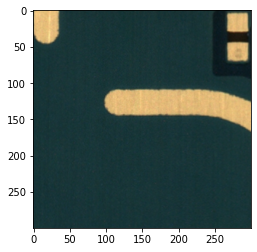

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xtest[0], cmap='brg')

In [0]:
xtrain = xtrain.astype('float32')
xtest  = xtest.astype('float32')

In [10]:
print(xtrain.shape)
print(ytrain.shape)

(199, 300, 300, 3)
(199,)


In [11]:
#keras.utils.normalize(a, axis=-1, order=2)
print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

print (np.max(ytrain),np.max(ytest))
print (np.min(ytrain),np.min(ytest))

mean = np.mean(xtrain)
std  = np.std(xtrain)

print(mean)
print(std)

xtrain -= mean
xtrain /= std

xtest -= mean
xtest /= std

print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

255.0 255.0
0.0 0.0
1.0 1.0
0.0 0.0
53.73399
54.452442
3.6961796 3.6961796
-0.98680586 -0.98680586


In [12]:
from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest  =  to_categorical(ytest)
print(ytest[0])

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

[0. 1.]


In [13]:
print(xtrain.shape)
print(ytrain.shape)

(199, 300, 300, 3)
(199, 2)


In [23]:
from keras.applications.nasnet import NASNetLarge
from keras.applications.resnet_v2 import ResNet152V2
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D,Input
from keras import backend as K

# create the base pre-trained model
input_tensor = Input(shape=(300, 300, 3))
base_model = NASNetLarge(input_tensor=input_tensor,weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(2, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
#for layer in base_model.layers:
#    layer.trainable = False

model.summary()


343613440/343610240 [==============================] - 5s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 300, 300, 3)  0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 149, 149, 96) 2592        input_2[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 149, 149, 96) 384         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 96) 0           stem_bn1[0][0]                   
________________________

In [0]:
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

In [25]:
print(xtrain.shape)
print(ytrain.shape)

(199, 300, 300, 3)
(199, 2)


In [26]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy' ,metrics=['accuracy'])
history=model.fit(xtrain, ytrain,batch_size=20,epochs=10, verbose=1)

Epoch 1/10
199/199 [==============================] - 589s 3s/step - loss: 0.6780 - accuracy: 0.5829
Epoch 2/10
199/199 [==============================] - 521s 3s/step - loss: 0.5211 - accuracy: 0.7889
Epoch 3/10
199/199 [==============================] - 519s 3s/step - loss: 0.4200 - accuracy: 0.8844
Epoch 4/10
199/199 [==============================] - 526s 3s/step - loss: 0.3227 - accuracy: 0.9095
Epoch 5/10
199/199 [==============================] - 531s 3s/step - loss: 0.2559 - accuracy: 0.9447
Epoch 6/10
199/199 [==============================] - 531s 3s/step - loss: 0.2205 - accuracy: 0.9749
Epoch 7/10
199/199 [==============================] - 527s 3s/step - loss: 0.1676 - accuracy: 0.9799
Epoch 8/10
199/199 [==============================] - 526s 3s/step - loss: 0.1212 - accuracy: 0.9950
Epoch 9/10
199/199 [==============================] - 529s 3s/step - loss: 0.1257 - accuracy: 0.9849
Epoch 10/10
199/199 [==============================] - 532s 3s/step - loss: 0.0921 - accura

In [27]:
model.evaluate(xtest,ytest)

99/99 [==============================] - 91s 917ms/step


[0.6663440622464575, 0.6363636255264282]

In [28]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.52      0.68      0.59        38
     class 1       0.76      0.61      0.67        61

    accuracy                           0.64        99
   macro avg       0.64      0.65      0.63        99
weighted avg       0.66      0.64      0.64        99



In [29]:
model.evaluate(xtrain,ytrain)

199/199 [==============================] - 170s 856ms/step


[0.5407044074343677, 0.6884422302246094]

In [30]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtrain)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytrain,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.80      0.59      0.68       111
     class 1       0.61      0.82      0.70        88

    accuracy                           0.69       199
   macro avg       0.71      0.70      0.69       199
weighted avg       0.72      0.69      0.69       199

